In [1]:
% matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
plt.rcParams['font.sans-serif'] = ['Cambria'] 

In [3]:
df = pd.read_csv('https://www.dropbox.com/s/kxmsz7wrpcncpkl/data.csv?dl=1')

In [4]:
df.head(10)

,stakes,offer,accept,wealth
0,200,50,1,1
1,200,5,1,1
2,20,2,0,1
3,200,5,0,1
4,2000,500,1,1
5,200,40,0,1
6,2000,500,1,1
7,200,1,0,0
8,2000,500,1,1
9,20,16,1,1


### Table 1: Experimental Design Summary

In [5]:
table1 = pd.crosstab(df['wealth'], df['stakes'], margins = True)

In [6]:
table1

stakes,20,200,2000,20000,All
wealth,,,,,
0,28,50,46,12,136
1,173,74,63,12,322
All,201,124,109,24,458


### Figure 1: Offer Proportion across Stakes

#### Generate a new column 'precent_Offer' for offer proportion, which is 'offer' divided by 'stakes'.

In [7]:
df = df.assign(percent_Offer = df['offer'] / df['stakes'])

In [8]:
df.head(10)

,stakes,offer,accept,wealth,percent_Offer
0,200,50,1,1,0.250
1,200,5,1,1,0.025
2,20,2,0,1,0.100
3,200,5,0,1,0.025
4,2000,500,1,1,0.250
5,200,40,0,1,0.200
6,2000,500,1,1,0.250
7,200,1,0,0,0.005
8,2000,500,1,1,0.250
9,20,16,1,1,0.800


#### Grouped by 'stakes', calculate the mean of 'percent_Offer' for each amount of stakes

In [9]:
figure1 = df.groupby(['stakes'])['percent_Offer'].mean().reset_index()

In [10]:
figure1

,stakes,percent_Offer
0,20,0.242289
1,200,0.174476
2,2000,0.144138
3,20000,0.120833


In [11]:
figure1.rename(columns = {'percent_Offer': 'average_share_offered'}, inplace = True)

In [12]:
figure1

,stakes,average_share_offered
0,20,0.242289
1,200,0.174476
2,2000,0.144138
3,20000,0.120833


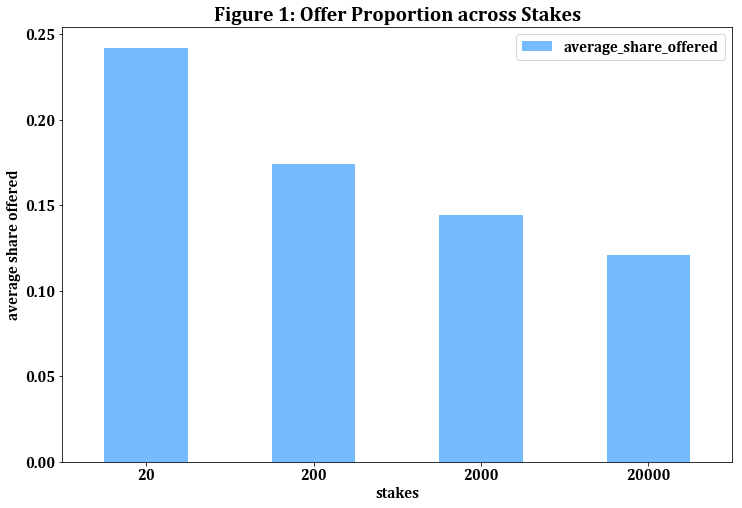

In [13]:
figure1.plot.bar(x = 'stakes', 
                 y = 'average_share_offered', 
                 rot = 0, 
                 color = 'xkcd:sky blue', 
                 figsize = (12, 8), 
                 fontsize = 15)
plt.title('Figure 1: Offer Proportion across Stakes', fontsize = 20)
plt.legend(fontsize = 15)
plt.xlabel('stakes', fontsize = 15)
plt.ylabel('average share offered', fontsize = 15);

### Figure 2: Offer Distribution across Stakes

#### Put rows that satisfies "stakes == x" into df_x

In [14]:
df_20 = df[df['stakes'] == 20]
df_200 = df[df['stakes'] == 200]
df_2000 = df[df['stakes'] == 2000]
df_20000 = df[df['stakes'] == 20000]

In [59]:
df_2000.head(10)

,stakes,offer,accept,wealth,percent_Offer
4,2000,500,1,1,0.250
6,2000,500,1,1,0.250
8,2000,500,1,1,0.250
17,2000,1900,1,0,0.950
18,2000,100,1,0,0.050
20,2000,120,0,0,0.060
36,2000,250,1,1,0.125
40,2000,10,0,1,0.005
46,2000,300,0,0,0.150
49,2000,50,0,1,0.025


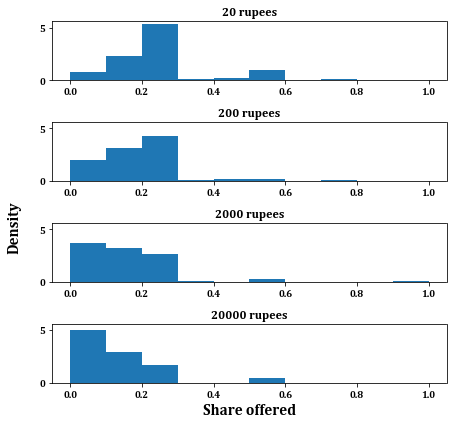

In [62]:
fig2, axarr = plt.subplots(4, sharey = True, figsize = (6, 6))

x_20 = df_20['percent_Offer']
x_200 = df_200['percent_Offer']
x_2000 = df_2000['percent_Offer']
x_20000 = df_20000['percent_Offer']

axarr[0].hist(x_20, 
              bins = 10, 
              range = (0, 1), 
              density = True)
axarr[0].set_title('20 rupees')

axarr[1].hist(x_200, bins = 10, range = (0, 1), density = True)
axarr[1].set_title('200 rupees')

axarr[2].hist(x_2000, bins = 10, range = (0, 1), density = True)
axarr[2].set_title('2000 rupees')

axarr[3].hist(x_20000, bins = 10, range = (0, 1), density = True)
axarr[3].set_title('20000 rupees')

fig2.subplots_adjust(hspace = 1)
fig2.text(-0.05, 0.5, 'Density', rotation='vertical', fontsize = 15)
plt.xlabel('Share offered', fontsize = 15)
plt.tight_layout()